In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import pandas as pd
from scipy.signal import hilbert, chirp

In [2]:
import measures as nolds

In [3]:
def var(u_e):
    return np.var(u_e)

def freq(u_e):
    ind = argrelextrema(np.array(u_e), np.greater)
#     print(ind)
    diffs = np.diff(argrelextrema(np.array(u_e), np.greater))
#     print(diffs)
    n = int(len(diffs)/2)
    sub_ind = diffs[n-1:n+1]
    abso = np.absolute(sub_ind)
#   print(mean(abso), "here")
    #print(1/(0.01*mean(abso)))
    freq = 1/np.mean(abso)
    return 1/(0.01*np.mean(abso))
#TIME STEP IS SIZE 0.01

#print(freq(G[:,0]),freq(G[:,1]))

In [4]:
#FINAL ONE
#param
freq_x = []
freq_y = []
var_x =[]
z_list = list(np.arange(-3,0,0.1))
for z in z_list:
    #print(z)
    alpha = 3
    a = 0.7
    b = 0.8
    omega_sq = 1
    #model -> G[x,y]

    def model(G,t):
        return np.array([ alpha*(G[1] + G[0] - ((G[0]**3)/3) + z), -(1/alpha)*(G[0] - a + (b*G[1]) )])

    t = np.linspace(0, 100,  10000)              # time step
    G0 = np.array([0, 0])                     # initials conditions
    G = odeint(model, G0, t)

#     plt.show()
    freq_x.append(freq(G[:,0]))
    var_x.append(var(G[5000:,0]))
    freq_y.append(freq(G[:,1]))



/scinet/gpc/Applications/anaconda3/4.2.0_hub/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [5]:
#fixing the frequencies

freq_new = []

for i in range(len(z_list)):
    if var_x[i] < 0.1:
        freq_new.append(0)
    else:
        freq_new.append(freq_x[i])


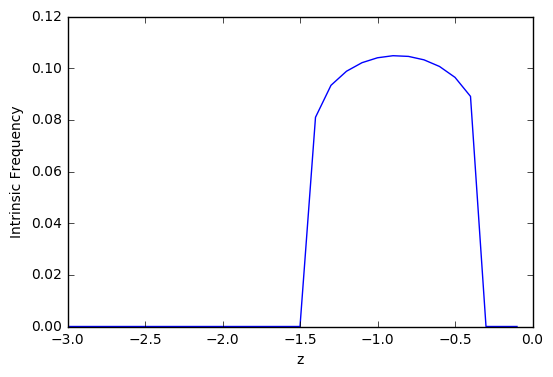

In [6]:
# #FINAL PLOT
plt.plot(z_list, freq_new)
plt.xlabel("z")
plt.ylabel("Intrinsic Frequency")
plt.show()
# freq_new

In [7]:
#GETTING THE VALUES FOR K1 AND K2
table = [z_list, freq_new]


k1_col = []
k1freq = []
k2_col = []
k2freq = []
perc_diff = []

k_freq = np.transpose(table)[16:-2]
k_freq
num_k_vals = np.shape(k_freq)[0] #num of rows

#k_freq is a 12x2 array with k values in first column and the corresponding freq in second, it contains the subset of k that 
#actually result in oscillations

for i in range(num_k_vals):
    for j in range(i,num_k_vals):
        #appending the k1 value from the ith row in the first column of k_freq
        k1_col.append(k_freq[:,0][i])
        #appending the k1 frequency from the ith row in the second column of k_freq
        k1freq.append(k_freq[:,1][i])
        k2_col.append(k_freq[:,0][j])
        k2freq.append(k_freq[:,1][j])
        
        #calculating the percent difference in frequencies
        perc = (1- (min(k_freq[j,1],k_freq[i,1])/max(k_freq[j,1],k_freq[i,1])))*100
        perc_diff.append(perc)

In [8]:
#converting to dataframe to see what data looks like
d = {'k1': k1_col, 'freq1': k1freq, 'k2': k2_col, 'freq2': k2freq, 'perc_diff': perc_diff}
df = pd.DataFrame(data=d)
df

,freq1,freq2,k1,k2,perc_diff
0,0.080981,0.080981,-1.4,-1.4,0.000000
1,0.080981,0.093371,-1.4,-1.3,13.269320
2,0.080981,0.098814,-1.4,-1.2,18.047200
3,0.080981,0.102122,-1.4,-1.1,20.701578
4,0.080981,0.104022,-1.4,-1.0,22.150239
5,0.080981,0.104822,-1.4,-0.9,22.744100
6,0.080981,0.104554,-1.4,-0.8,22.546146
7,0.080981,0.103223,-1.4,-0.7,21.547380
8,0.080981,0.100660,-1.4,-0.6,19.549848
9,0.080981,0.096442,-1.4,-0.5,16.031673


In [9]:
#FINAL PERCENT DIFFERENCE COLUMN
df_sorted = df.sort_values('perc_diff')
df_single = df_sorted.drop_duplicates('perc_diff')
df_final= df_single.drop(77)
#df_final

In [10]:
#fixing the perc diff values -- final_df_numpy
df_numpy = df_final.values
arr_perc_diff = df_numpy[:,4] #saving the 5th column (the percent differences)

indices = [len(arr_perc_diff)-1] #saving a list of indices to remove rows from df_numpy becuase we don't want
                                        #we don't want freq diff too close to one another
                                        #the first element is the last index bc we dont want 100% diff (skews graph)
first_diff = np.round(np.diff(arr_perc_diff))

#going through first difference
for i in range(len(first_diff)):
    if first_diff[i] < 1:
        indices.append(i)

final_df_numpy = np.delete(df_numpy, indices, 0)
#now final_df_numpy is same as df_numpy except a bunch of rows removed that we don't need
print(final_df_numpy[:,4])
print(np.shape(final_df_numpy))

[  2.57574038   5.7312253    6.56879554   7.99399914   8.56935367
  10.92436975  11.50700862  13.70423981  15.02059904  16.03167258
  18.04720037  19.54984832  20.70157849  21.54738033  22.74409995]
(15, 5)


In [14]:
#PART 2, PLOTTING COUPLED OSCI
#The following code defines the "right hand side" of the system of equations (also known as a vector field). 

from scipy.integrate import odeint
import matplotlib.pyplot as plt

def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [alpha, k1, k2, c, b,a]
    """
    x1, y1, x2, y2 = w
    alpha, k1, k2, c, b, a = p

    # Create f = (x1',y1',x2',y2'):
    f = [ alpha*(y1 + x1 - ((x1**3)/3) + k1+ c*x2),
         -(1/alpha)*( x1- a + (b*y1)), 
         alpha*(y2 + x2 - ((x2**3)/3) + k2+ c*x1),
        -(1/alpha)*( x2- a + (b*y2))]
    
    return f

In [15]:
# Use ODEINT to solve the differential equations defined by the vector field
solution_list = [] #from this we can get time series for everything

freq_listx1 = []
freq_listx2 = []

var_listx1 = []
var_listx2 = []

x1ts_list = []
x2ts_list = []

c_list = np.linspace(0,1.5,150)

# freq_listy2 = []
# freq_listy1 = []
# var_listy1 = []
# var_listy2 = []

#for each row in final_df_numpy set the k1 and k2
for i in range(np.shape(final_df_numpy)[0]):
    k1 = final_df_numpy[i,2]
    k2 = final_df_numpy[i,3]
    
    for c in c_list:

        # Parameter values
        alpha = 3
        a = 0.7
        b = 0.8

        # Initial conditions
        x1 = 0.0
        y1 = 0.0
        x2 = 0.0
        y2 = 0.0

        # Pack up the parameters and initial conditions:
        p = [alpha, k1, k2, c, b, a]
        w0 = [x1, y1, x2, y2]
        t = np.linspace(0, 100,  10000)              # time step

        #Call the ODE solver.
        wsol = odeint(vectorfield, w0, t, args=(p,))
        
        x1= wsol[:,0]
        x2= wsol[:,2]
        

        solution_list.append(wsol)
        
        freq_listx1.append(freq(x1))
        freq_listx2.append(freq(x2))
        
        var_listx2.append(var(x2))
        var_listx1.append(var(x1))

        x1ts_list.append(x1)
        x2ts_list.append(x2)
        

#         y1= wsol[:,1]
#         y2= wsol[:,3]
#         freq_listy1.append(freq(y1))
#         freq_listy2.append(freq(y2))
#         var_listy2.append(var(y2))
#         var_listy1.append(var(y1))

/scinet/gpc/Applications/anaconda3/4.2.0_hub/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


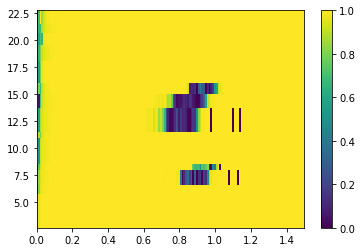

In [44]:
#calculate coherence --NEED TO FIX
# PhaseCoherence(freq, timeSeries, FS)

#PART 1
# phase_list = []
# errors = []
# for j in range(num_runs):
#     try:
#         coh = PhaseCoherence(float(freq_newx1b[j]), [x1ts_list[j][2000:],x2ts_list[j][2000:]],100)
#         phase_list.append(coh)
#     except:
#         phase_list.append("error")
#         errors.append(j)

# #         checking what the errors were
#         plt.plot(x1ts_list[j])
#         plt.show()

#         plt.plot(x2ts_list[j])
#         plt.show()

#PART 2
#fix the errors
# for err in errors:
#     phase_list[err] = 0.0

#PART 3
# PLOTTING
x=c_list
y=final_df_numpy[:,4] #this is the last column - list of percent differences (15 of them)
z=np.array(phase_list)

x=np.unique(x)
y=np.unique(y)
X,Y = np.meshgrid(x,y)

#phase_list is arranged so that its a sequence of 15 groups, each of 50 values (for diff c), since numpy is row-major, it'll
#fill array by rows, so you want there to be 15 rows, and 50 columns

Z= z.reshape(len(y),len(x))

# plt.pcolormesh(X,Y,Z,edgecolor='k')
plt.pcolormesh(X,Y,Z)
plt.colorbar()
plt.show()

In [16]:
num_runs = len(x1ts_list)

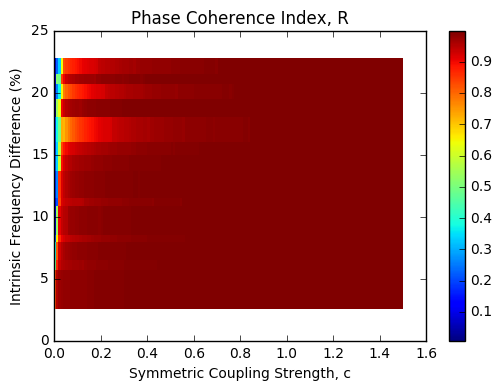

In [21]:
##CALCULATING THE R AGAIN BUT THIS WITH A DIFFERENT TECHNIQUE

## testing
#len(x1ts_list)
# signal = x1ts_list[0]
# analytic_signal = hilbert(x1ts_list[0])
# amplitude_envelope = np.abs(analytic_signal)
# instantaneous_phase = np.unwrap(np.angle(analytic_signal))
# np.shape(instantaneous_phase)
# plt.plot(instantaneous_phase)
# plt.show()

# #CALCULATING
# new_phase_list = []

# for i in range(num_runs):
#     signal1 = x1ts_list[i]
#     signal2 = x2ts_list[i]

#     analytic_signal1 = hilbert(signal1)
#     analytic_signal2 = hilbert(signal2)

#     instantaneous_phase1 = np.unwrap(np.angle(analytic_signal1))
#     instantaneous_phase2 = np.unwrap(np.angle(analytic_signal2))
    
#     diff = instantaneous_phase1 - instantaneous_phase2
#     r = np.abs(np.sum(np.exp(1j*diff))/len(signal1))
    
#     new_phase_list.append(r)
    
# PLOTTING
x=c_list
y=final_df_numpy[:,4] #this is the last column - list of percent differences (15 of them)
z=np.array(new_phase_list)

x=np.unique(x)
y=np.unique(y)
X,Y = np.meshgrid(x,y)

Z= z.reshape(len(y),len(x))

# plt.pcolormesh(X,Y,Z,edgecolor='k')
plt.pcolormesh(X,Y,Z)
plt.xlabel('Symmetric Coupling Strength, c')
plt.ylabel('Intrinsic Frequency Difference (%)')
plt.title('Phase Coherence Index, R')
plt.colorbar()
plt.show()
    


In [61]:
np.sum(x1ts_list[0]-x1ts_list[1])

81.496589095398889

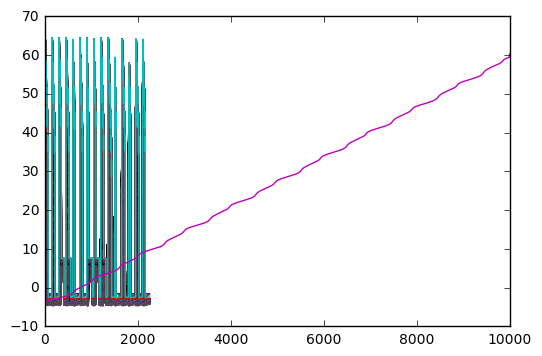

In [43]:



fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)

In [46]:
#data to use for the rest of the proj
# x axis - c_list

#y_axis
perc_diff_list = final_df_numpy[:,4]

print(len(c_list), len(perc_diff_list))
print(num_runs, len(x1ts_list), len(c_list)*len(perc_diff_list))

150 15
2250 2250 2250


In [21]:
#MAXIMUM LYAPUNOV EXPONENT
rwalk = np.cumsum(np.random.random(1000))
h = nolds.dfa(rwalk)
h

2.0351508123487569

In [34]:
np.save('max_lyap_x1.npy', max_lyap_x1)
np.save('max_lyap_x1.npy', max_lyap_x2)
np.save('x1ts_list.npy', x1ts_list)
np.save('x2ts_list.npy',x2ts_list)

In [ ]:
max_lyap_x1 = []
max_lyap_x2 = []
posx1_ind = []
posx2_ind = []

for i in range(num_runs):
    lx1 = nolds.lyap_r(x1ts_list[i])
    lx2 = nolds.lyap_r(x2ts_list[i])
    
    max_lyap_x1.append(lx1)
    max_lyap_x2.append(lx2)
    
    if lx1 > 0:
        posx1_ind.append(i)
    if lx2 > 0:
        posx2_ind.append(i)

#         print(i, n)
#         plt.plot(x1_tsb[i])
#         plt.show()


/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/bg01/homescinet/l/lfefebvr/noorir/measures.py:248: RuntimeWarning: signal has very low me

layp x1


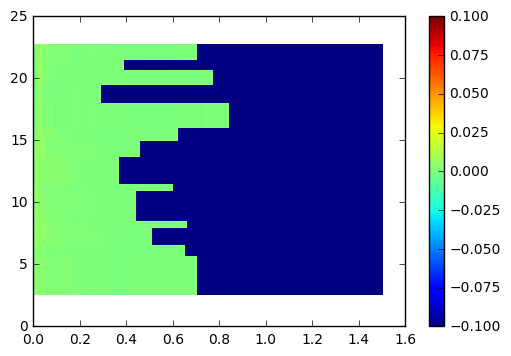

layp x2


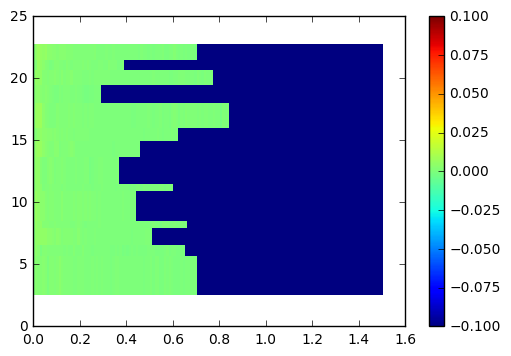

In [32]:
#PLOTTING LYAP FOR X1
print("layp x1")
x=c_list
y=perc_diff_list
z=np.array(max_lyap_x1)

x=np.unique(x)
y=np.unique(y)
X,Y = np.meshgrid(x,y)

#phase_list is arranged so that its a sequence of 15 groups, each of 50 values (for diff c), since numpy is row-major, it'll
#fill array by rows, so you want there to be 15 rows, and 50 columns

Z= z.reshape(len(y),len(x))

plt.pcolormesh(X,Y,Z)
plt.colorbar()

plt.show()

#PLOTTING LYAP FOR X2
print("layp x2")

x=c_list
y=perc_diff_list
z=np.array(max_lyap_x2)

x=np.unique(x)
y=np.unique(y)
X,Y = np.meshgrid(x,y)

#phase_list is arranged so that its a sequence of 15 groups, each of 50 values (for diff c), since numpy is row-major, it'll
#fill array by rows, so you want there to be 15 rows, and 50 columns

Z= z.reshape(len(y),len(x))

# plt.pcolormesh(X,Y,Z,edgecolor='k')
plt.pcolormesh(X,Y,Z)
plt.colorbar()

plt.show()

In [ ]:
nolds.corr_dim(x1ts_list[0],10)

In [36]:
np.shape(dim_x1)

(2,)

In [35]:
dim_x1 = []
dim_x2 = []

for i in range(num_runs):
    dx1 = nolds.corr_dim(x1ts_list[i],10)
    dx2 = nolds.corr_dim(x2ts_list[i],10)
    
    dim_x1.append(dx1)
    dim_x2.append(dx2)

np.save('dim_x1.npy', dim_x1)
np.save('dim_x2.npy', dim_x2)

KeyboardInterrupt: 

In [ ]:
#PLOTTING DIM FOR X1
print("DIM x1")
x=c_list
y=perc_diff_list
z=np.array(dim_x1)

x=np.unique(x)
y=np.unique(y)
X,Y = np.meshgrid(x,y)

Z= z.reshape(len(y),len(x))

plt.pcolormesh(X,Y,Z)
plt.colorbar()

plt.show()

#PLOTTING LYAP FOR X2
print("DIM x2")

x=c_list
y=perc_diff_list
z=np.array(dim_x2)

x=np.unique(x)
y=np.unique(y)
X,Y = np.meshgrid(x,y)

Z= z.reshape(len(y),len(x))

plt.pcolormesh(X,Y,Z)
plt.colorbar()

plt.show()